In [1]:
## Import relevant libraries
import sys
import os
import shutil
from natsort import natsorted  # For natural sorting
sys.path.append('../../activedrops')

## Including ourselves
import quadrop as qd
qd.set_plotting_style()


In [3]:
data_path = "../../data/"

# let's declare the variable "conditions" to the sorted list of subdirectories from data_path
conditions = natsorted([f for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))])[::-1]

# let's declare the variable "subconditions" to the sorted list of subdirectories from the first condition
subconditions = natsorted([f for f in os.listdir(os.path.join(data_path, conditions[0])) if os.path.isdir(os.path.join(data_path, conditions[0], f))])

subconditions

['Pos0']

In [4]:
def reorgTiffsToOriginal(data_path, conditions, subconditions):
    """
    Args:
        data_path (_type_): _description_
        conditions (_type_): _description_
        subconditions (_type_): _description_
        
        
    Activate when you have your subconditions inside the conditions folder. 
    This function renames the subconditions as PosX and moves the raw data do "original" folder.
    """
    
    
    for condition in conditions:
        # Get the actual subconditions in the directory
        actual_subconditions = [name for name in os.listdir(os.path.join(data_path, condition)) if os.path.isdir(os.path.join(data_path, condition, name))]
        
        # Rename the actual subconditions to match the subconditions in your list
        for i, actual_subcondition in enumerate(sorted(actual_subconditions)):
            os.rename(os.path.join(data_path, condition, actual_subcondition), os.path.join(data_path, condition, subconditions[i]))
        
        for subcondition in subconditions:
            # Construct the path to the subcondition directory
            subcondition_path = os.path.join(data_path, condition, subcondition)
            
            # Create the path for the "original" directory within the subcondition directory
            original_dir_path = os.path.join(subcondition_path, "original")
            
            # Always create the "original" directory
            os.makedirs(original_dir_path, exist_ok=True)
            
            # Iterate over all files in the subcondition directory
            for filename in os.listdir(subcondition_path):
                # Check if the file is a .tif file
                if filename.endswith(".tif"):
                    # Construct the full path to the file
                    file_path = os.path.join(subcondition_path, filename)
                    
                    # Construct the path to move the file to
                    destination_path = os.path.join(original_dir_path, filename)
                    
                    # Move the file to the "original" directory
                    shutil.move(file_path, destination_path)
            print(f"Moved .tif files from {subcondition_path} to {original_dir_path}")


reorgTiffsToOriginal(data_path, conditions, subconditions)

Moved .tif files from ../../data/kva/Pos0 to ../../data/kva/Pos0/original
Moved .tif files from ../../data/kif5/Pos0 to ../../data/kif5/Pos0/original
Moved .tif files from ../../data/Unc/Pos0 to ../../data/Unc/Pos0/original
Moved .tif files from ../../data/TrVa/Pos0 to ../../data/TrVa/Pos0/original
Moved .tif files from ../../data/TrBr/Pos0 to ../../data/TrBr/Pos0/original
Moved .tif files from ../../data/TiLa/Pos0 to ../../data/TiLa/Pos0/original
Moved .tif files from ../../data/ThTr/Pos0 to ../../data/ThTr/Pos0/original
Moved .tif files from ../../data/StyLe/Pos0 to ../../data/StyLe/Pos0/original
Moved .tif files from ../../data/SteCoe4/Pos0 to ../../data/SteCoe4/Pos0/original
Moved .tif files from ../../data/SteCoe/Pos0 to ../../data/SteCoe/Pos0/original
Moved .tif files from ../../data/PoVi/Pos0 to ../../data/PoVi/Pos0/original
Moved .tif files from ../../data/PaBi/Pos0 to ../../data/PaBi/Pos0/original
Moved .tif files from ../../data/NaGr/Pos0 to ../../data/NaGr/Pos0/original
Move

In [5]:
# frame info
min_frame = 0
max_frame = None
skip_frames=32
frame_rate=30
time_intervals = [180] * len(conditions)


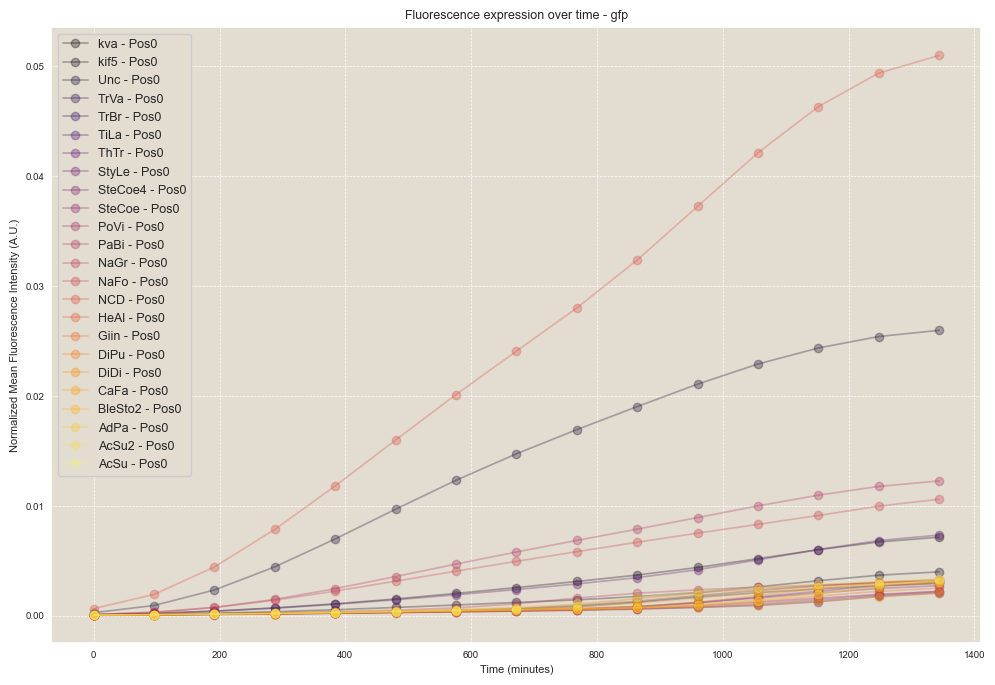

In [6]:
# Call the function with the updated parameters
qd.plot_fluorescence_vs_time(
    data_path=data_path,
    conditions=conditions,
    subconditions=subconditions,
    channel="gfp",
    time_intervals=time_intervals,  
    min_frame=min_frame,
    max_frame=max_frame,
    skip_frames=skip_frames,
    log_scale=False,  # Set log_scale to True
    timescale="min"
)


In [10]:
# frame info
min_frame = 0
max_frame = None
skip_frames=8
frame_rate=30

# channel info
channel = "cy5"
vmax = 0.4

qd.single_fluorescence_movies(data_path, conditions, subconditions, channel, time_intervals, min_frame, max_frame, vmax, skip_frames, frame_rate)

Video saved to ../../data/single_movies_cy5/kva_Pos0-cy5.avi
Video saved to ../../data/single_movies_cy5/kif5_Pos0-cy5.avi
Video saved to ../../data/single_movies_cy5/Unc_Pos0-cy5.avi
Video saved to ../../data/single_movies_cy5/TrVa_Pos0-cy5.avi
Video saved to ../../data/single_movies_cy5/TrBr_Pos0-cy5.avi
Video saved to ../../data/single_movies_cy5/TiLa_Pos0-cy5.avi
Video saved to ../../data/single_movies_cy5/ThTr_Pos0-cy5.avi
Video saved to ../../data/single_movies_cy5/StyLe_Pos0-cy5.avi
Video saved to ../../data/single_movies_cy5/SteCoe4_Pos0-cy5.avi
Video saved to ../../data/single_movies_cy5/SteCoe_Pos0-cy5.avi
Video saved to ../../data/single_movies_cy5/PoVi_Pos0-cy5.avi
Video saved to ../../data/single_movies_cy5/PaBi_Pos0-cy5.avi
Video saved to ../../data/single_movies_cy5/NaGr_Pos0-cy5.avi
Video saved to ../../data/single_movies_cy5/NaFo_Pos0-cy5.avi
Video saved to ../../data/single_movies_cy5/NCD_Pos0-cy5.avi
Video saved to ../../data/single_movies_cy5/HeAl_Pos0-cy5.avi
Video

In [14]:
qd.grid_heatmaps(data_path, conditions, subconditions, channel, frame_rate=frame_rate, figsize=(20,24))


Video saved to ../../data/control-ATP7mM/grid-gfp.avi


In [ ]:
# channel info
channel = "gfp"
vmax = 0.02

qd.single_fluorescence_movies(data_path, conditions_MT, subconditions, channel, time_intervals, min_frame, max_frame, vmax, skip_frames, frame_rate)

In [ ]:
qd.grid_heatmaps(data_path, conditions_MT, subconditions, channel, frame_rate=frame_rate, figsize=(20,24))


In [ ]:

# frame info
min_frame = 0
max_frame = None
skip_frames=4
frame_rate=30
time_intervals = [30, 30, 30]

# channel info
channel = "gfp"
vmax = 0.02

qd.single_fluorescence_movies(data_path, conditions[3:], subconditions, channel, time_intervals, min_frame, max_frame, vmax, skip_frames, frame_rate)

In [ ]:
qd.grid_heatmaps(data_path, conditions[3:], subconditions, channel, frame_rate=frame_rate, figsize=(20,24))
